In [2]:
!pip install pandas
!pip install seaborn

  Using cached https://files.pythonhosted.org/packages/70/94/784178ca5dd892a98f113cdd923372024dc04b8d40abe77ca76b5fb90ca6/pytz-2021.1-py2.py3-none-any.whl


In [66]:
import pandas as pd
import matplotlib.pyplot as plt


In [67]:
seasons = ["2016-17", "2017-18", "2018-19", "2019-20", "2020-21"]

def get_player_directories(player):
    player_first_name = player.split()[0]
    player_second_name = player.split()[1]
    player_directories = dict()
    for season in seasons:
        players_ids = pd.read_csv("data/{}/player_idlist.csv".format(season))
        player_id = kane_id = players_ids.loc[(players_ids['first_name'] == player_first_name) &
                                              (players_ids['second_name'] == player_second_name)]

        try:
            pid = player_id.id.values[0]
            if season in ["2016-17", "2017-18"]:
                player_directories[season] = "data/{}/players/{}_{}".format(season, player_first_name, player_second_name) 
            else:
                player_directories[season] = "data/{}/players/{}_{}_{}".format(season, player_first_name, player_second_name, pid)       
        except:
            print ('Cannot find')
    return player_directories
            

In [40]:
kane_directories = get_player_directories("Harry Kane")
salah_directories = get_player_directories("Mohamed Salah")

Cannot find


In [41]:
kane_directories

{'2016-17': 'data/2016-17/players/Harry_Kane',
 '2017-18': 'data/2017-18/players/Harry_Kane',
 '2018-19': 'data/2018-19/players/Harry_Kane_372',
 '2019-20': 'data/2019-20/players/Harry_Kane_338',
 '2020-21': 'data/2020-21/players/Harry_Kane_388'}

In [42]:
salah_directories

{'2017-18': 'data/2017-18/players/Mohamed_Salah',
 '2018-19': 'data/2018-19/players/Mohamed_Salah_253',
 '2019-20': 'data/2019-20/players/Mohamed_Salah_191',
 '2020-21': 'data/2020-21/players/Mohamed_Salah_254'}

In [49]:
def get_dataframes_for_player(player_directory_dict):
    player_dataframes = dict()
    for season in player_directory_dict.keys():
        player_dataframes[season] = player_directory_dict[season] + '/gw.csv'
    return player_dataframes

In [53]:
kane_dataframes = get_dataframes_for_player(kane_directories)
salah_dataframes = get_dataframes_for_player(salah_directories)

In [52]:
kane_dataframes

{'2016-17': 'data/2016-17/players/Harry_Kane/gw.csv',
 '2017-18': 'data/2017-18/players/Harry_Kane/gw.csv',
 '2018-19': 'data/2018-19/players/Harry_Kane_372/gw.csv',
 '2019-20': 'data/2019-20/players/Harry_Kane_338/gw.csv',
 '2020-21': 'data/2020-21/players/Harry_Kane_388/gw.csv'}

In [56]:
#plot charts showing goals scored by player with minutes played
def plot_goals_minutes(player, player_dataframes):
    for season in player_dataframes.keys():
        dataframe = pd.read_csv(player_dataframes[season])
        fig, ax1 = plt.subplots()

        color = 'tab:blue'
        ax1.set_xlabel('Match')
        ax1.set_ylabel('Goals', color=color)
        ax1.bar(range(1, len(dataframe)+1), dataframe['goals_scored'])
        plt.yticks([0, 1, 2, 3, 4, 5])
        plt.xticks([1, 5, 10, 15, 20, 25, 30, 38])

        ax2 = ax1.twinx()

        color = 'tab:red'
        ax2.set_ylabel('Minutes', color=color)
        ax2.plot(range(1, len(dataframe)+1), dataframe['minutes'], color='r')
        ax2.tick_params(axis='y', labelcolor='r')
        plt.title("Goals and minutes for {} season {}".format(player, season))
        plt.yticks([0, 15, 30, 45, 60, 75, 90])

        fig.tight_layout() 
        plt.show()

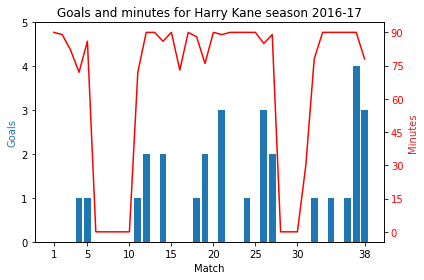

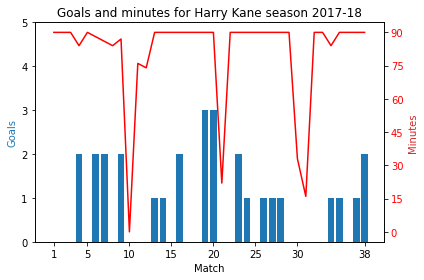

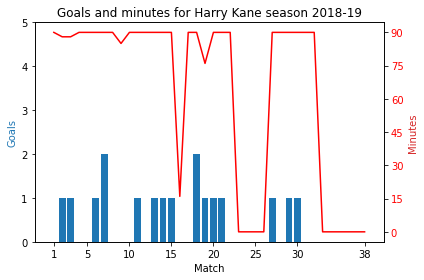

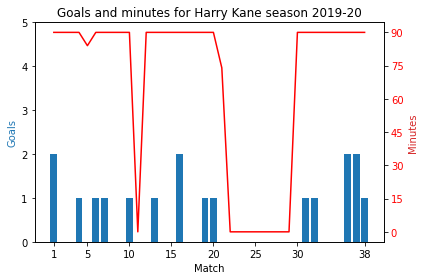

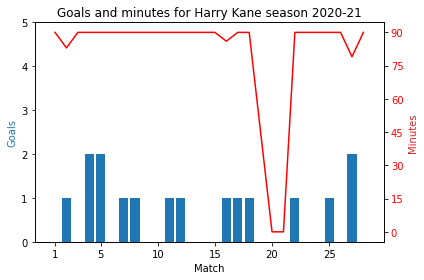

In [55]:
plot_goals_minutes("Harry Kane", kane_dataframes)

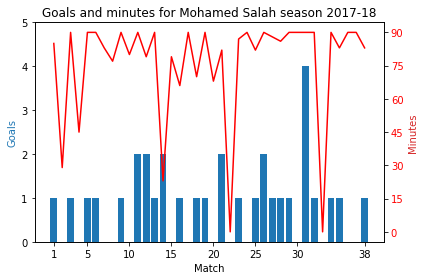

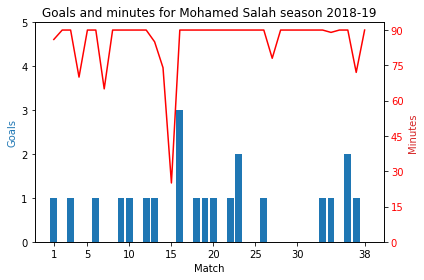

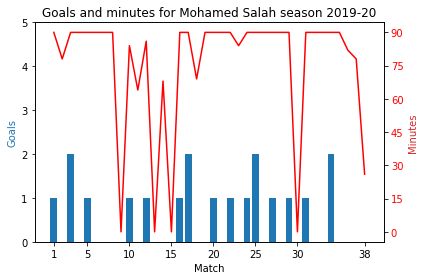

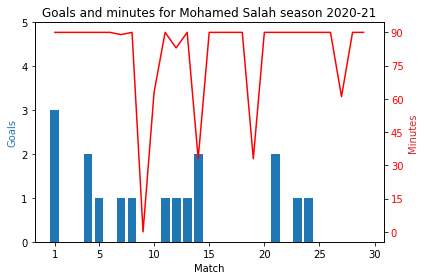

In [65]:
plot_goals_minutes("Mohamed Salah", salah_dataframes)

## Trying to concatenate all dataframes for all seasones 

In [30]:
bigdata = pd.concat([kane_2016_17, kane_2017_18, kane_2018_19], ignore_index=True, sort=False)

In [58]:
print(kane_2018_19.sum()['minutes'] / kane_2018_19.sum()['goals_scored'])
print(kane_2018_19.sum()['assists'])
print(kane_2018_19.sum()['big_chances_created'])

142.52941176470588
6
6


In [59]:
print(bigdata.sum()['goals_scored'])
print(bigdata.sum()['minutes'])
print(bigdata.sum()['big_chances_created'])

75
8020
18


In [61]:
bigdata.columns


Index(['assists', 'attempted_passes', 'big_chances_created',
       'big_chances_missed', 'bonus', 'bps', 'clean_sheets',
       'clearances_blocks_interceptions', 'completed_passes', 'creativity',
       'dribbles', 'ea_index', 'element', 'errors_leading_to_goal',
       'errors_leading_to_goal_attempt', 'fixture', 'fouls', 'goals_conceded',
       'goals_scored', 'ict_index', 'id', 'influence', 'key_passes',
       'kickoff_time', 'kickoff_time_formatted', 'loaned_in', 'loaned_out',
       'minutes', 'offside', 'open_play_crosses', 'opponent_team', 'own_goals',
       'penalties_conceded', 'penalties_missed', 'penalties_saved',
       'recoveries', 'red_cards', 'round', 'saves', 'selected', 'tackled',
       'tackles', 'target_missed', 'team_a_score', 'team_h_score', 'threat',
       'total_points', 'transfers_balance', 'transfers_in', 'transfers_out',
       'value', 'was_home', 'winning_goals', 'yellow_cards'],
      dtype='object')

In [261]:
bigdata

,assists,attempted_passes,big_chances_created,big_chances_missed,bonus,bps,clean_sheets,clearances_blocks_interceptions,completed_passes,creativity,...,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,winning_goals,yellow_cards
0,0,22,0,0,0,5,0,1,17,15.3,...,1,4.0,2,0,0,0,110,False,0,0
1,1,29,0,0,0,19,1,0,20,23.8,...,1,41.0,5,-32117,13110,45227,110,True,0,0
2,0,19,0,0,0,2,0,1,6,10.6,...,1,6.0,2,-124703,6334,131037,109,True,0,0
3,0,16,0,0,0,28,1,3,10,5.8,...,0,50.0,6,8509,81771,73262,109,False,0,0
4,0,16,0,1,3,38,1,0,14,52.8,...,1,109.0,9,20666,45347,24681,109,True,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,0,0,0,0,0,0,0,0,0,0.0,...,1,0.0,0,-70469,169,70638,126,False,0,0
110,0,0,0,0,0,0,0,0,0,0.0,...,1,0.0,0,-70469,169,70638,126,True,0,0
111,0,0,0,0,0,0,0,0,0,0.0,...,0,0.0,0,-13971,98,14069,126,True,0,0
112,0,0,0,0,0,0,0,0,0,0.0,...,1,0.0,0,-8066,92,8158,126,False,0,0


In [63]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt


In [64]:
corr = kane_2020_21.corr()
corr.style.background_gradient(cmap='coolwarm')

c:\python37\lib\site-packages\pandas\io\formats\style.py:1264: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
c:\python37\lib\site-packages\pandas\io\formats\style.py:1265: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards
assists,1.000000,0.460972,0.714555,-0.015782,0.393729,nan,-0.366079,-0.027845,0.400265,0.556412,0.707300,0.104018,0.143664,nan,nan,nan,nan,-0.376262,nan,-0.373958,0.460286,0.313648,0.238923,0.759628,0.017260,-0.067375,-0.080008,-0.460858,0.041274,0.119149
bonus,0.460972,1.000000,0.870997,0.056678,0.640623,nan,-0.209456,-0.047668,0.840516,0.779586,0.854294,0.220215,0.250929,nan,nan,nan,nan,-0.194516,nan,-0.035293,0.387513,0.251468,0.448024,0.870738,-0.053363,-0.207460,-0.087145,-0.237537,0.025557,-0.152473
bps,0.714555,0.870997,1.000000,0.010952,0.681019,nan,-0.258520,0.024098,0.903682,0.849516,0.981174,0.253839,0.219734,nan,nan,nan,nan,-0.248652,nan,-0.196707,0.508287,0.450075,0.438239,0.985757,0.100702,-0.034539,-0.178320,-0.349935,0.111711,-0.082687
clean_sheets,-0.015782,0.056678,0.010952,1.000000,0.194073,nan,0.064767,-0.682806,-0.016122,0.065424,0.001820,0.239455,-0.124979,nan,nan,nan,nan,0.020927,nan,0.196161,-0.448844,-0.011576,0.045366,0.011320,0.123634,0.115944,-0.091529,0.138335,0.076472,0.279623
creativity,0.393729,0.640623,0.681019,0.194073,1.000000,nan,-0.216832,-0.081317,0.567988,0.811032,0.664716,0.398000,0.437428,nan,nan,nan,nan,-0.232831,nan,-0.272846,0.370659,0.096756,0.561487,0.639060,0.138628,-0.057009,-0.253091,-0.322939,-0.142643,-0.064935
element,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
fixture,-0.366079,-0.209456,-0.258520,0.064767,-0.216832,nan,1.000000,-0.009990,-0.159393,-0.307693,-0.293782,-0.242447,-0.156767,nan,nan,nan,nan,0.989328,nan,0.238088,-0.362557,0.284609,-0.241637,-0.306725,-0.013725,0.168216,0.155855,0.823080,-0.061812,-0.129435
goals_conceded,-0.027845,-0.047668,0.024098,-0.682806,-0.081317,nan,-0.009990,1.000000,0.041830,0.024048,0.058566,0.259647,0.303485,nan,nan,nan,nan,0.016968,nan,-0.117390,0.295032,0.282338,0.029296,0.025455,0.369900,0.249024,-0.352581,-0.151000,-0.119051,-0.190929
goals_scored,0.400265,0.840516,0.903682,-0.016122,0.567988,nan,-0.159393,0.041830,1.000000,0.795449,0.910221,0.236722,0.148601,nan,nan,nan,nan,-0.143327,nan,-0.087864,0.412459,0.472311,0.453398,0.881576,0.116813,0.013071,-0.164098,-0.249859,0.210819,-0.162288
ict_index,0.556412,0.779586,0.849516,0.065424,0.811032,nan,-0.307693,0.024048,0.795449,1.000000,0.881097,0.421261,0.395307,nan,nan,nan,nan,-0.321517,nan,-0.307632,0.430662,0.290863,0.824958,0.857583,0.234891,0.063737,-0.299841,-0.485987,0.098194,-0.143140
